Presented by: Reza Saadatyar <br/>
E-mail: Reza.Saadatyar92@gmail.com

**Importing the required Libraries**

In [137]:
import numpy as np
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection
from sklearn.neighbors import KNeighborsClassifier


**1. Load data**

In [139]:
method = 2
if method==1:
   x, y = datasets.make_classification(n_samples=500,      # Number of samples in the dataset
                                       n_features=3,       # Number of total features
                                       n_informative=2,    # Number of informative features
                                       n_redundant=0,      # Number of redundant features
                                       n_classes=2,        # Number of classes in the dataset (binary classification in this case)
                                       random_state=1)     # Seed for reproducibility)
   print(f"{x.shape=},\n{x=},\n{y=}")
elif method==2:
   iris = datasets.load_iris()
   x = iris.data
   y = iris.target
   print(f"{iris.data.shape=},\n{iris.feature_names=},\n{iris.target_names=},\n{iris.data=},\n{iris.target}")

iris.data.shape=(150, 4),
iris.feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
iris.target_names=array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
iris.data=array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],


**2. Data preparation**

In [140]:
df = pd.DataFrame(x)
df.head(6)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4


In [141]:
df['class'] = y
df.head(6)

,0,1,2,3,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


**3. Split data**

In [98]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=1)
print(f"{x_train.shape}")
print(f"{x_test.shape}")
print(f"{y_train.shape}")
print(f"{y_test.shape}")

(350, 3)
(150, 3)
(350,)
(150,)


**4. Classification**

In [104]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
P = model.predict_proba(x_test)
print(f"{P.shape = }")

P.shape = (150, 2)


In [106]:
auc = metrics.roc_auc_score(y_test, P[:,1])
print(f"{auc = }")
fpr, tpr, thresholds = metrics.roc_curve(y_test, P[:, 1])

auc = 0.9640633339263476


**Plot**

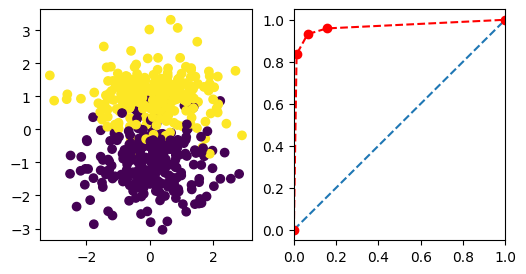

In [122]:
_, axs= plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].scatter(df.iloc[:,1], df.iloc[:,2], c=df["class"])
axs[1].plot([0, 1], [0, 1], linestyle='--')
axs[1].plot(fpr, tpr, 'r--o', )
plt.autoscale(axis="x", tight=True, enable=True)

Text(0, 0.5, 'Frequency')

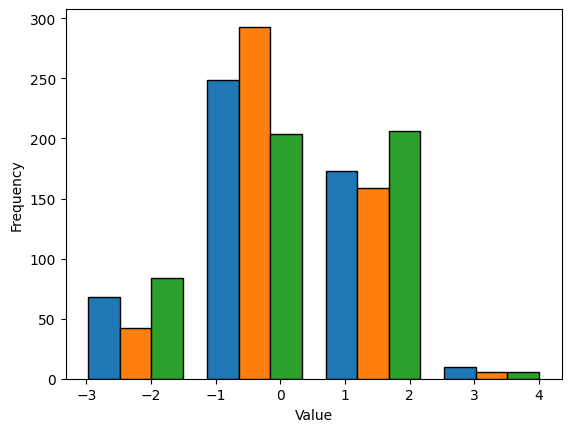

In [110]:
plt.hist(x, bins=4,edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')

In [ ]:
df.iloc[:,:3].plot.box(color={'boxes': 'Green', 'whiskers': 'red','medians': 'Blue', 'caps': 'Gray'})
df.columns = ["A", "B", "C", "D"]
df.iloc[:,:3].plot.box(vert=False, positions=[1, 4, 5], color={'boxes': 'Green', 'whiskers': 'red','medians': 'Blue', 'caps': 'Gray'})

In [149]:
# df.columns =['a', 'b', 'c','d']
df.columns

Index([0, 1, 2, 3, 'class'], dtype='object')

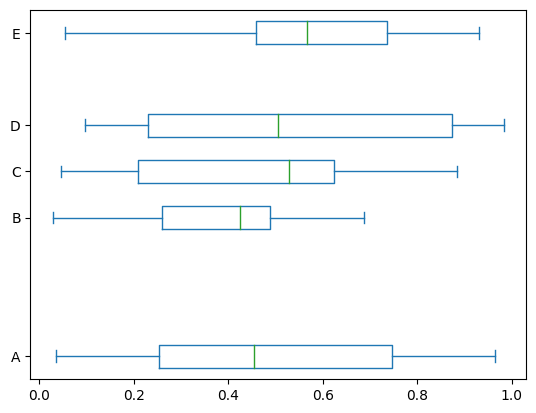

In [138]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box(vert=False, positions=[1, 4, 5, 6, 8]);

In [ ]:
n,bins,_= plt.hist(x, bins=20,edgecolor='black',normed=1)
y=mlab.normpdf(bins,100,15)
plt.plot(bins,y,'r')

**Confusion matrix**<br/>

![Confusion Matrix.JPG](<attachment:Confusion Matrix.JPG>)

- `True Positive (TP)`: The number of instances correctly predicted as positive (actual class is positive, and the model predicted it as positive).
- `True Negative (TN):` The number of instances correctly predicted as negative (actual class is negative, and the model predicted it as negative).
- `False Positive (FP):` Also known as a Type I error, it is the number of instances incorrectly predicted as positive (actual class is negative, but the model predicted it as positive).
- `False Negative (FN):` Also known as a Type II error, it is the number of instances incorrectly predicted as negative (actual class is positive, but the model predicted it as negative).
- `Accuracy:` (TP + TN) / (TP + TN + FP + FN)
- `Precision:` TP / (TP + FP)
- `Recall (Sensitivity or True positive rate (TPR)):` TP / (TP + FN)
- `Specificity (True negetive rate (TNR)):` TN / (TN + FP)
- `F1 Score:` (1 - Specificity) or (2 * (Precision * Recall) / (Precision + Recall))


|  |Predicted Class 0|Predicted Class 1|Predicted Class 2|       
|:---:|:----:|:---:|:---:|                                                      
|Actual Class 0|  C00 |   C01 |   C02|
|Actual Class 1|  C10 |   C11 |   C12|
|Actual Class 2|  C20|   C21|     C22| 

<br/>


| |Precision|Recall (Sensitivity)|F1 Score|
|:---:|:----:|:---:|:---:|    
|Class 0:|$C_{00} / (C_{00} + C_{10} + C_{20})$|$C_{00} / (C_{00} + C_{01} + C_{02})$|$2 * Precision_{0} * Recall_{0} / (Precision_{0} + Recall_{0})$|
|Class 1:|$C_{11} / (C_{01} + C_{11} + C_{21})$|$C_{11} / (C_{10} + C_{11} + C_{12})$|$2 * Precision_{1} * Recall_{1} / (Precision_{1} + Recall_{1})$|
|Class 2:|$C_{22} / (C_{02} + C_{12} + C_{22})$|$C_{22} / (C_{20} + C_{21} + C_{22})$|$2 * Precision_{2} * Recall_{2} / (Precision_{2} + Recall_{2})$|

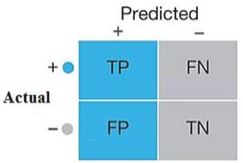

In [ ]:
c=metrics.confusion_matrix(actual,predicted,labels=["spam","real"])
acc=metrics.accuracy_score(actual,predicted)
cr= metrics.classification_report(actual,predicted)